# Breast Cancer Detection Using Artificial Neural Networks




## Importing libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [24]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

## Importing dataset

In [141]:
import io

dataset = pd.read_csv(io.StringIO(uploaded['breastcancer.csv'].decode('utf-8')))


## Printing the dataset

In [142]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Encoding the 'diagnosis' column into 0s and 1s

In [143]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['diagnosis']=encoder.fit_transform(dataset['diagnosis'])
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Dropping the unnecessary columns

In [144]:
dataset=dataset.drop(['radius_worst','perimeter_worst','area_worst','concave points_worst','perimeter_se','id'],axis=1)


In [145]:
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,0.20980,0.86630,0.6869,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.4087,0.12400


## Description of dataset

In [146]:
dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,25.677223,0.132369,0.254265,0.272188,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,6.146258,0.022832,0.157336,0.208624,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,12.020000,0.071170,0.027290,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,21.080000,0.116600,0.147200,0.114500,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,25.410000,0.131300,0.211900,0.226700,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,29.720000,0.146000,0.339100,0.382900,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,49.540000,0.222600,1.058000,1.252000,0.663800,0.207500


## Information of dataset

In [147]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

## Checking for any null values

In [148]:
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
texture_worst              0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Heatmap showing the correlation values

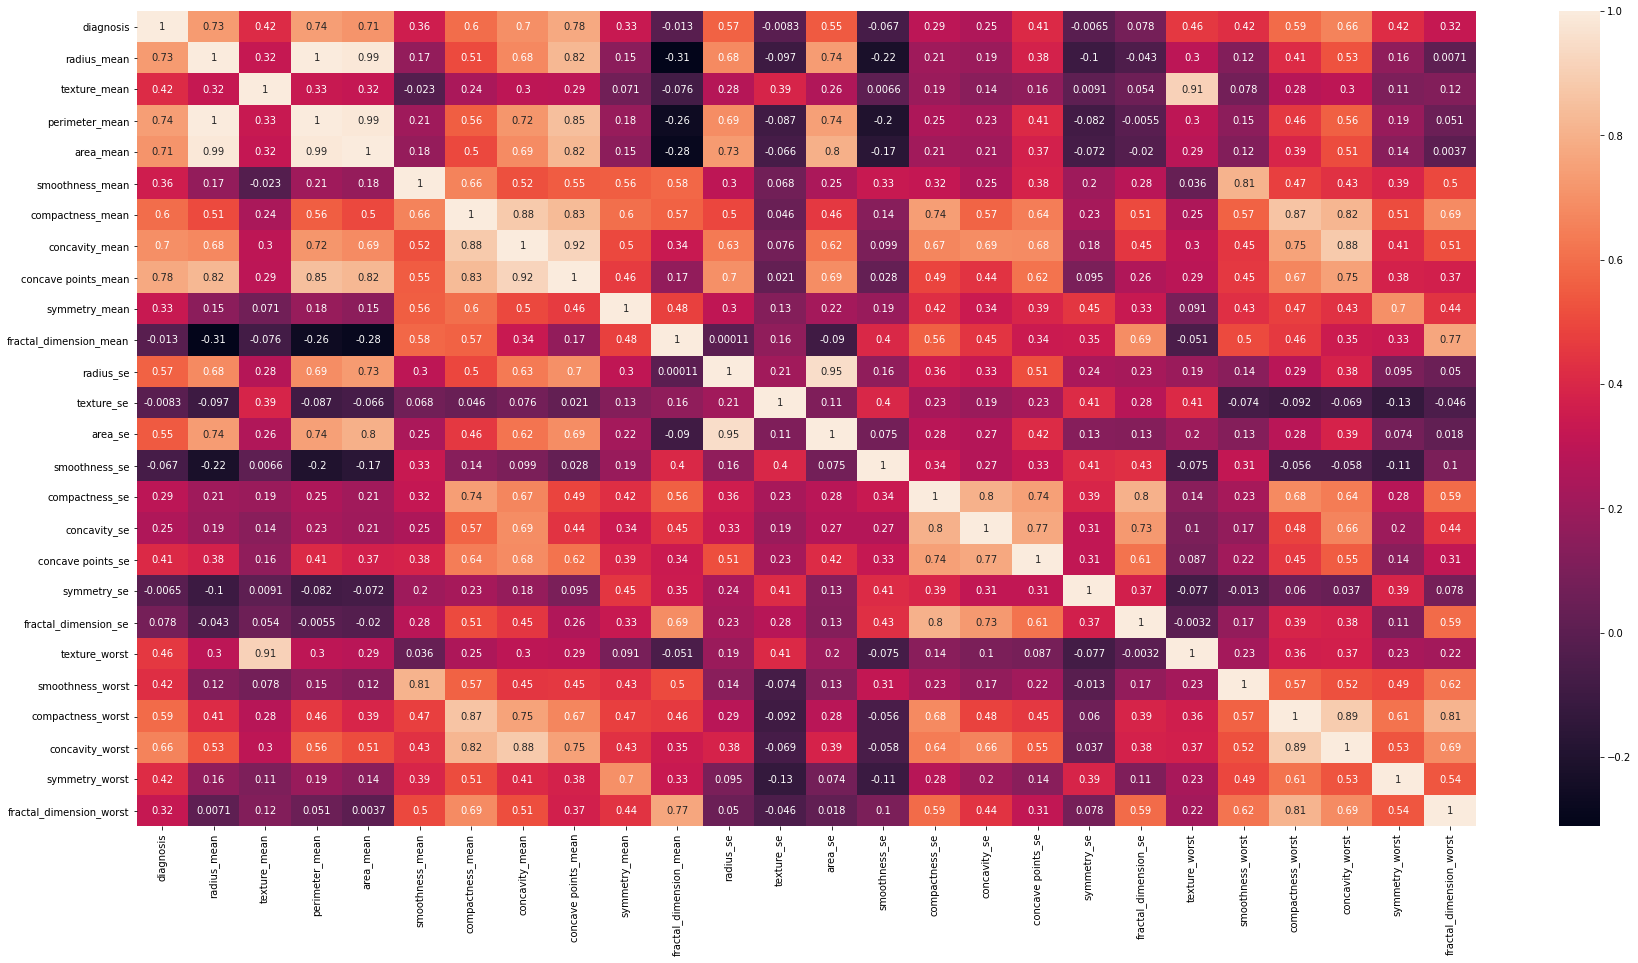

In [149]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)

## Pairplots showing the values of different attributes contributing towards the presence/absence of breast cancer

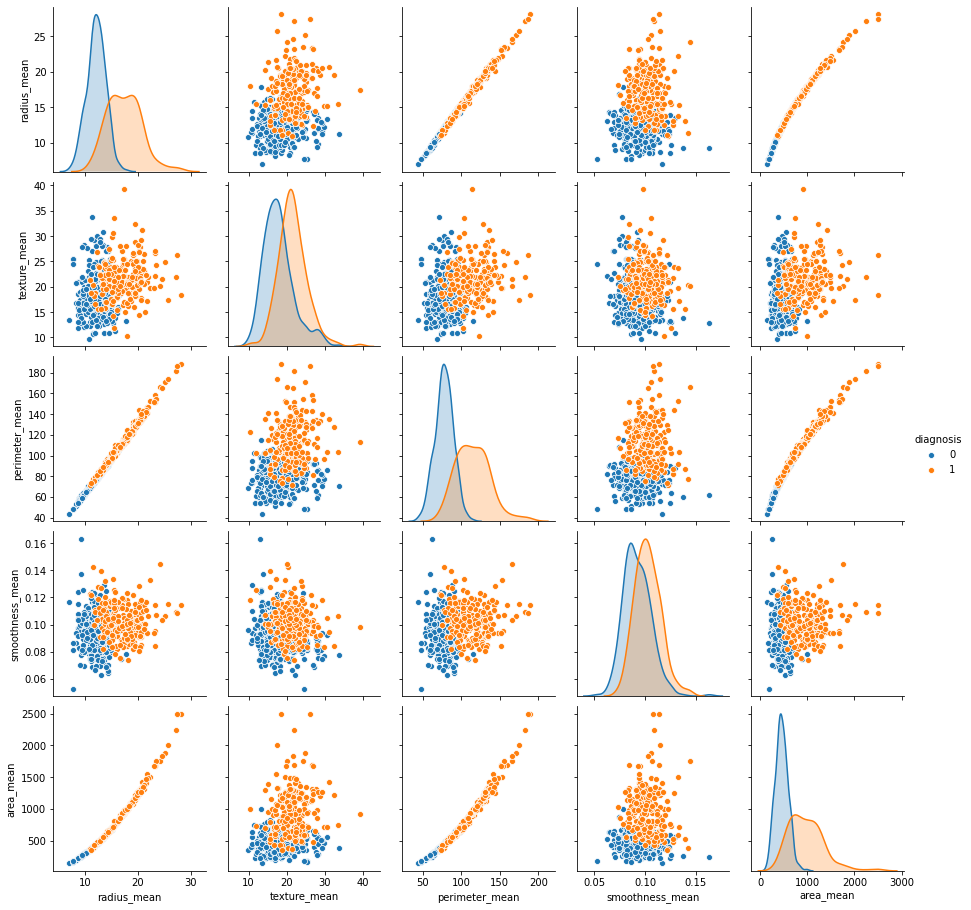

In [150]:
sns.pairplot(dataset,hue='diagnosis',vars=['radius_mean','texture_mean','perimeter_mean','smoothness_mean','area_mean'])

## Getting independent and dependent variables from the dataset

In [151]:
X=dataset.iloc[:,1:]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,0.20980,0.86630,0.6869,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.4087,0.12400


In [152]:
y=dataset.iloc[:,0]
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [153]:
X=X.values
y=y.values

## Normalization (scaling all the values between 0 and 1)

In [154]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

## Splitting into training and test set

In [155]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)

test_x.shape
size=test_x.shape[1]
size

25

## Applying ANN and finding the best values for the hyperparameters

In [156]:
import keras
from keras.models import Sequential

from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = size))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier


classifier = KerasClassifier(build_fn = build_classifier)

parameters={'batch_size': [10,20,30], 'epochs' : [100,200,300]}

#now we will implement gridsearch 

grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=5,n_jobs=-1)

grid_search=grid_search.fit(train_x,train_y)
best_parameters=grid_search.best_params_

Epoch 1/100
455/455 [==============================] - 0s 299us/step - loss: 0.6917 - accuracy: 0.6110
Epoch 2/100
455/455 [==============================] - 0s 68us/step - loss: 0.6867 - accuracy: 0.6374
Epoch 3/100
455/455 [==============================] - 0s 68us/step - loss: 0.6740 - accuracy: 0.6440
Epoch 4/100
455/455 [==============================] - 0s 70us/step - loss: 0.6443 - accuracy: 0.7407
Epoch 5/100
455/455 [==============================] - 0s 68us/step - loss: 0.5932 - accuracy: 0.8330
Epoch 6/100
455/455 [==============================] - 0s 67us/step - loss: 0.5185 - accuracy: 0.8637
Epoch 7/100
455/455 [==============================] - 0s 67us/step - loss: 0.4411 - accuracy: 0.9099
Epoch 8/100
455/455 [==============================] - 0s 68us/step - loss: 0.3636 - accuracy: 0.9055
Epoch 9/100
455/455 [==============================] - 0s 66us/step - loss: 0.3049 - accuracy: 0.9187
Epoch 10/100
455/455 [==============================] - 0s 68us/step - loss: 0.26

In [157]:
best_parameters

{'batch_size': 20, 'epochs': 100}

In [158]:
batch_size=best_parameters['batch_size']
batch_size

20

In [159]:
epochs=best_parameters['epochs']
epochs

100

## Applying ANN with the optimized values of hyperparameters

In [160]:
from keras.models import Sequential
from keras.layers import Dense


In [161]:
classifier=Sequential()

In [162]:

classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = size))
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=classifier.fit(train_x,train_y,epochs=epochs,batch_size=batch_size,validation_data = (test_x,test_y))

Train on 455 samples, validate on 114 samples
Epoch 1/100
455/455 [==============================] - 0s 297us/step - loss: 0.6914 - accuracy: 0.6396 - val_loss: 0.6909 - val_accuracy: 0.5877
Epoch 2/100
455/455 [==============================] - 0s 73us/step - loss: 0.6870 - accuracy: 0.6374 - val_loss: 0.6868 - val_accuracy: 0.5877
Epoch 3/100
455/455 [==============================] - 0s 70us/step - loss: 0.6781 - accuracy: 0.6374 - val_loss: 0.6757 - val_accuracy: 0.5877
Epoch 4/100
455/455 [==============================] - 0s 74us/step - loss: 0.6584 - accuracy: 0.6440 - val_loss: 0.6527 - val_accuracy: 0.5965
Epoch 5/100
455/455 [==============================] - 0s 68us/step - loss: 0.6234 - accuracy: 0.6835 - val_loss: 0.6071 - val_accuracy: 0.7018
Epoch 6/100
455/455 [==============================] - 0s 69us/step - loss: 0.5666 - accuracy: 0.7824 - val_loss: 0.5446 - val_accuracy: 0.7719
Epoch 7/100
455/455 [==============================] - 0s 70us/step - loss: 0.4945 - accu

In [163]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

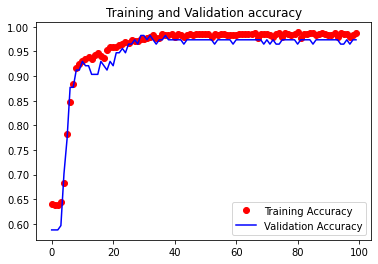

In [164]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


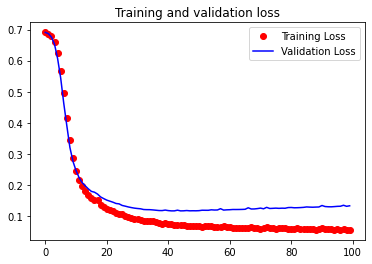

In [165]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Predictions on test data

In [166]:
y_pred = classifier.predict(test_x)
#probability showing the individual having breast cancer (Malignant)
#probability over 50% would indicate the presence of breast cancer

y_pred = (y_pred > 0.5)   #Converting the probabilities into 'true' and 'false'

## Confusion matrix and heatmap for visualizing the accuracy of ANN on test data

In [167]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
cm

array([[66,  1],
       [ 2, 45]])

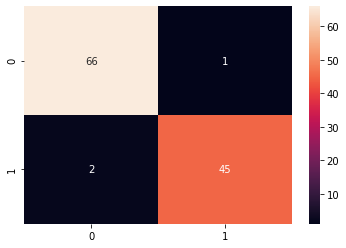

In [168]:
sns.heatmap(cm,annot=True)

## Accuracy on test data

In [169]:
print("Accuracy Score:",round((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])*100,2))

Accuracy Score: 97.37


# End of Project.